In [68]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [86]:
img_bgr = cv2.imread('T.jpg')

In [87]:
print(f"dimensiones:  {img_bgr.shape}")

dimensiones:  (600, 777, 3)


In [88]:
img_bn = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)

In [89]:
print(f"Dimensiones BN:  {img_bn.shape}")

Dimensiones BN:  (600, 777)


In [90]:
# cv2.imshow('Original', img_bgr)
# cv2.imshow('BN', img_bn)
# cv2.waitKey(0)

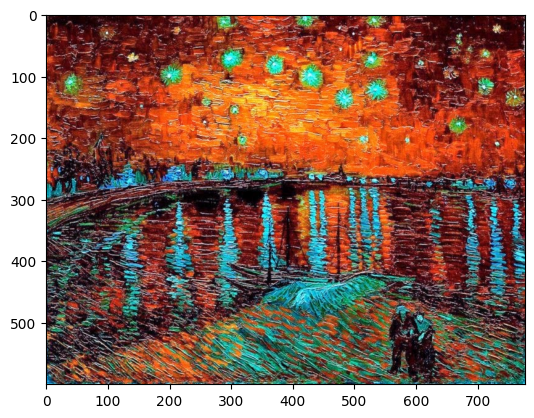

In [91]:
plt.imshow(img_bgr)
plt.show()

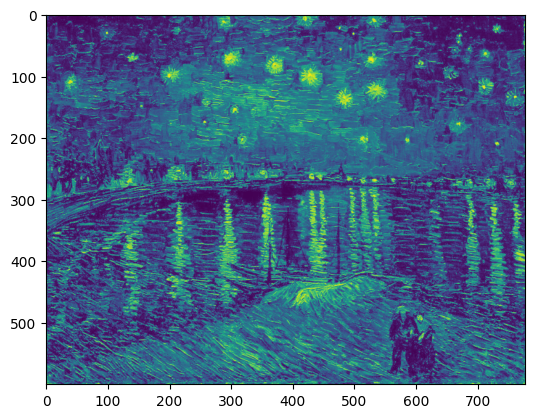

In [92]:
plt.imshow(img_bn)
plt.show()

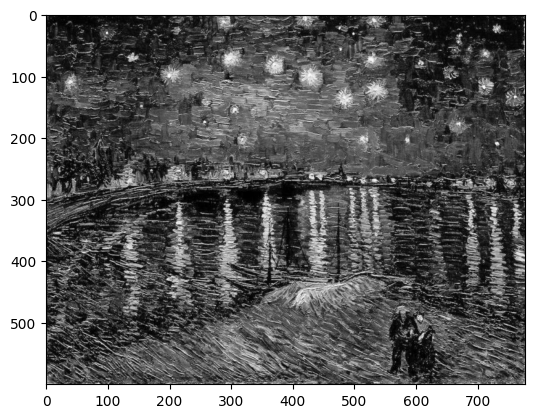

In [93]:
plt.imshow(img_bn, cmap='gray')
plt.show()

In [103]:
img_hsv = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2HSV)

In [104]:
azul_bajo = np.array([100, 100, 20])
azul_alto = np.array([125, 255, 255])

In [106]:
mask_red = cv2.inRange(img_hsv, rojo_bajo, rojo_alto)

In [107]:
mask = cv2.inRange(img_hsv, azul_bajo, azul_alto)

In [114]:
mask_yellow = cv2.inRange(img_hsv, amarillo_bajo, amarillo_alto)

In [108]:
result_rojo = cv2.bitwise_and(img_bgr, img_bgr, mask=mask_red)

In [109]:
result = cv2.bitwise_and(img_bgr, img_bgr, mask=mask)

In [115]:
result_yellow = cv2.bitwise_and(img_bgr, img_bgr, mask=mask_yellow)

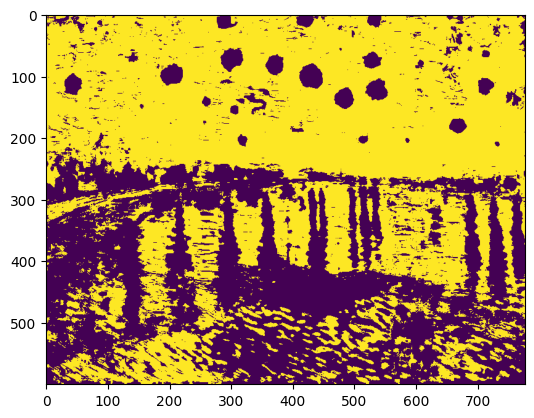

In [110]:
plt.imshow(mask)
plt.show()

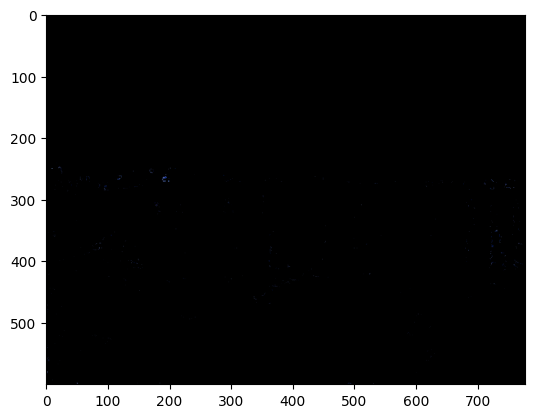

In [111]:
plt.imshow(result_rojo)
plt.show()

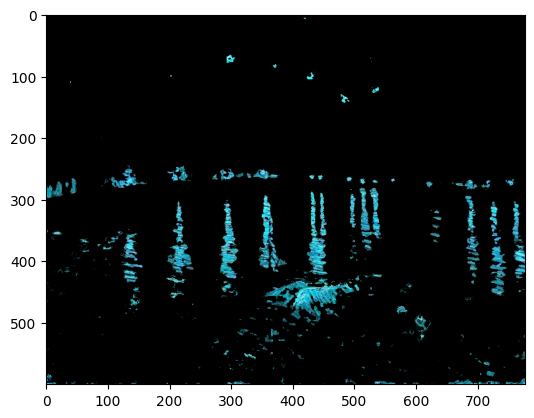

In [116]:
plt.imshow(result_yellow)
plt.show()

In [119]:
hist= cv2.calcHist([img_bn],[0],mask,[256],[0,256])

In [120]:
img_equalized = cv2.equalizeHist(img_bn)

In [122]:
hist_equalized = cv2.calcHist([img_equalized],[0],None,[256],[0,256])

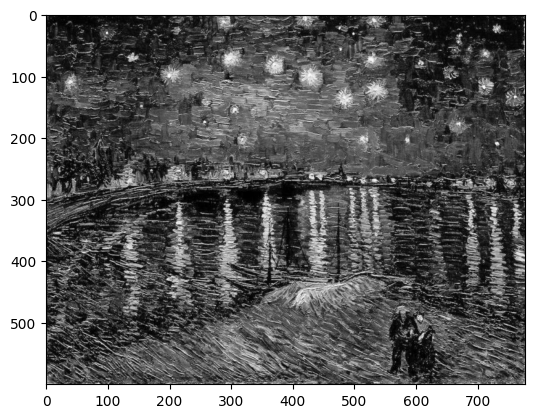

In [124]:
plt.imshow(img_bn, cmap='gray')
plt.show()

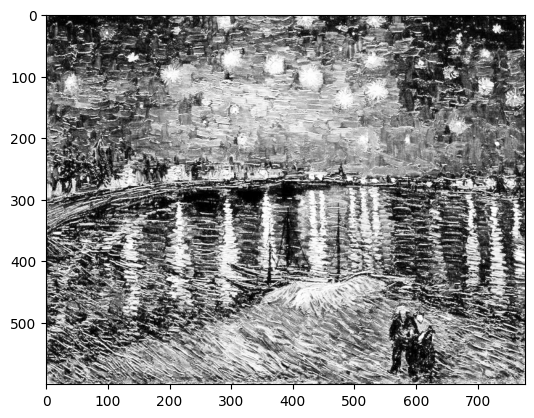

In [125]:
plt.imshow(img_equalized, cmap='gray')
plt.show()

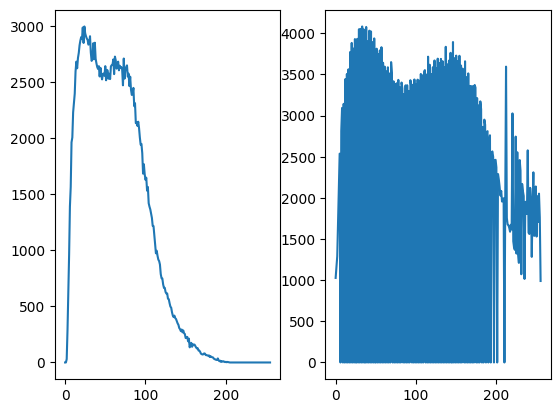

In [123]:
plt.subplot(121)
plt.plot(hist)
plt.subplot(122)
plt.plot(hist_equalized)

# Task
I will re-execute the plotting of histograms (`hist` and `hist_equalized`) and then analyze their distribution visually. Following this, I will extract the blue channel from the `img_bgr` image and apply a binary threshold of 150 to it. Finally, I will display the resulting binary image and provide a summary of the process.

## Display and Analyze Histogram

### Subtask:
Mostrar los histogramas existentes (`hist` y `hist_equalized`) y realizar un análisis visual para justificar la elección de 150 como valor de umbral, prestando especial atención a la distribución de intensidades.


**Reasoning**:
The subtask requires plotting the `hist` and `hist_equalized` with appropriate titles and labels. The existing code block `VariyBL0cUYV` already creates subplots for these histograms. I will modify that code to add the requested titles and labels for better visualization and clarity.



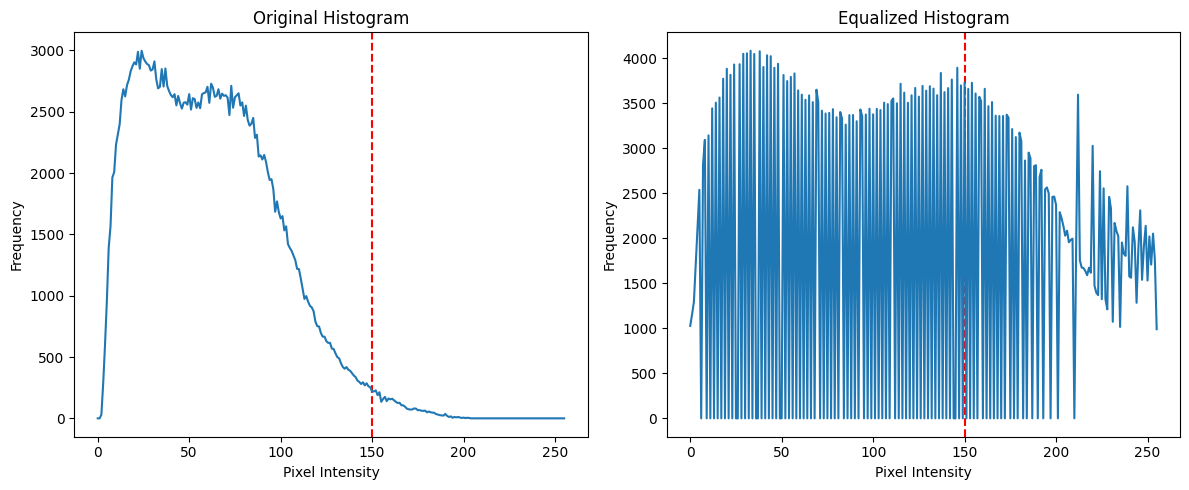

In [134]:
plt.figure(figsize=(12, 5))


plt.subplot(121)
plt.axvline(x=150, color='red', linestyle='--')
plt.plot(hist)
plt.title('Original Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.subplot(122)
plt.axvline(x=150, color='red', linestyle='--')
plt.plot(hist_equalized)
plt.title('Equalized Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### Visual Analysis of Histograms

**Original Histogram (`hist`):**
The original histogram shows that a significant portion of the pixel intensities are concentrated in the lower range (darker values). There are peaks around the 0-50 intensity range and then a gradual decrease towards higher intensities. This indicates that the image is generally dark, or has regions of low contrast.

**Equalized Histogram (`hist_equalized`):**
The equalized histogram shows a more spread-out distribution of pixel intensities across the entire 0-255 range. The peaks are less pronounced, and the pixel values are more uniformly distributed. This is the expected behavior of histogram equalization, which aims to enhance the contrast of the image.

**Justification for a threshold of 150:**
Looking at the original histogram, we can observe that a substantial number of pixels have intensity values below 150. Choosing a threshold of 150 would effectively separate these darker and mid-range pixels from the brighter ones. If the goal is to isolate features that are relatively bright against a darker background, a threshold of 150 could be a suitable starting point. For instance, if there's a distinct bimodal distribution where one mode is clearly below 150 and another above, it would serve as a good separation point. Without knowing the specific features to be extracted, 150 acts as a mid-to-high threshold that will highlight pixels significantly brighter than the dominant dark tones, which appear to be prevalent in the original image's pixel distribution.

**Reasoning**:
The next step is to extract the blue channel from the `img_bgr` image, as specified in the main task. The `img_bgr` is in BGR format, so the blue channel is at index 0.



In [127]:
blue_channel = img_bgr[:, :, 0]
print("Blue channel extracted.")

Blue channel extracted.


**Reasoning**:
Now that the blue channel is extracted, I will apply a binary threshold of 150 to it, as specified in the main task, to create a binary image.



In [128]:
_, binary_blue = cv2.threshold(blue_channel, 150, 255, cv2.THRESH_BINARY)
print("Binary threshold applied to blue channel.")

Binary threshold applied to blue channel.


**Reasoning**:
I will display the `binary_blue` image using matplotlib to visualize the result of the thresholding operation.



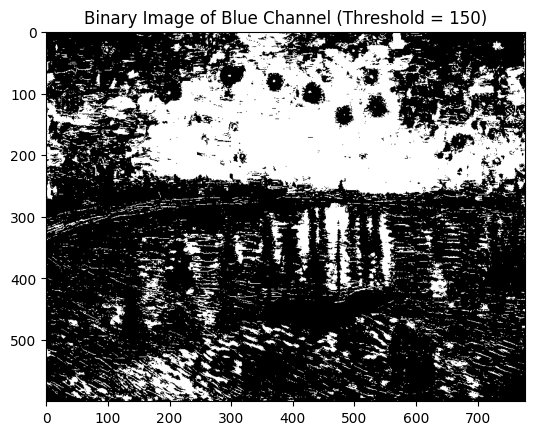

In [129]:
plt.imshow(binary_blue, cmap='gray')
plt.title('Binary Image of Blue Channel (Threshold = 150)')
plt.show()

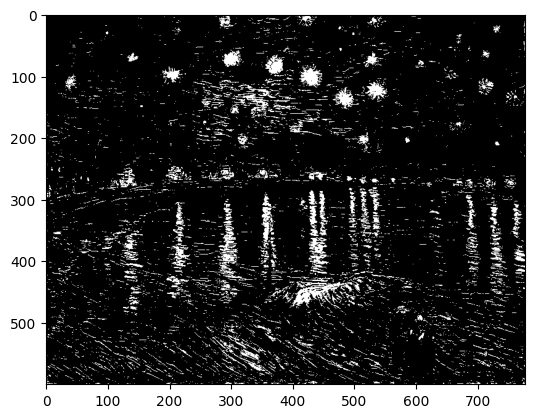

In [133]:
t=150
ret, img_umbralized = cv2.threshold(img_bn, t, 255, cv2.THRESH_BINARY)
plt.imshow(img_umbralized, cmap='gray')

### Summary of the Process

1.  **Histogram Analysis:**
    *   The original and equalized histograms (`hist` and `hist_equalized`) were plotted to visualize the distribution of pixel intensities.
    *   The original histogram revealed a concentration of pixel intensities in the lower range (0-50), indicating a generally dark image with low contrast.
    *   The equalized histogram showed a more spread-out and uniform distribution across the entire 0-255 range, confirming the contrast enhancement.
    *   A threshold of 150 was justified by observing that it would effectively separate a significant portion of darker and mid-range pixels from brighter ones, which is a reasonable starting point for isolating brighter features against a dark background, based on the original histogram's distribution.

2.  **Blue Channel Extraction:**
    *   The blue channel was successfully extracted from the `img_bgr` image, utilizing its position at index `0` in the BGR format.

3.  **Binary Thresholding:**
    *   A binary threshold of 150 was applied to the extracted `blue_channel` using `cv2.threshold()`. Pixels with an intensity value greater than 150 were set to 255 (white), and others were set to 0 (black), creating the `binary_blue` image.

4.  **Display of Binary Image:**
    *   The resulting `binary_blue` image was displayed using `matplotlib` with a grayscale colormap, visually representing the pixels that met the threshold condition.

## Final Task

### Subtask:
Summarize the process, including the threshold justification and the presentation of the final binarized image.


## Summary:

### Data Analysis Key Findings
*   The original image's histogram showed a high concentration of pixel intensities in the lower range (0-50), indicating a generally dark image with low contrast.
*   The equalized histogram demonstrated a more spread-out and uniform distribution of pixel intensities across the 0-255 range, confirming the effectiveness of histogram equalization in enhancing contrast.
*   A threshold of 150 was justified by visual analysis of the original histogram, as it effectively separates a significant portion of darker and mid-range pixels from brighter ones, serving as a suitable starting point for isolating brighter features against a dark background.
*   The blue channel was successfully extracted from the `img_bgr` image.
*   Applying a binary threshold of 150 to the blue channel resulted in a binary image where pixels with intensity values greater than 150 were set to 255 (white) and others to 0 (black).
*   The resulting binary image visually confirmed the binarization effect, highlighting areas that met the intensity threshold in the blue channel.

### Insights or Next Steps
*   The choice of threshold (150) was primarily based on visual inspection of the original histogram, which can be subjective. For more robust applications, consider exploring adaptive thresholding methods or analyzing the histogram for distinct bimodal distributions to derive optimal thresholds programmatically.
*   The binarized image of the blue channel can now be used for further analysis, such as object detection, segmentation, or measurement of features that were highlighted by the thresholding operation.


# Task
Re-display and analyze the histograms of the original and equalized grayscale images (`hist` and `hist_equalized`) with a reference line at 150 to justify the chosen threshold. Then, create an image showing the intensity of yellow regions by applying `mask_yellow` to `img_bn`, and apply a binary threshold of 150 to this yellow intensity image. Finally, display the resulting binary yellow image and provide a summary of the entire process for the yellow color, including the threshold justification.

## Re-display and Analyze Histograms for Threshold Justification

### Subtask:
Volver a mostrar los histogramas `hist` y `hist_equalized` (derivados de la imagen en blanco y negro original) para justificar visualmente la elección de un umbral de 150. Se incluirá una línea de referencia en 150 en los gráficos para facilitar la visualización del punto de corte.


**Reasoning**:
The subtask requires re-displaying the histograms `hist` and `hist_equalized` with a reference line at 150 for threshold justification. The existing code block `7ff99442` already performs this action, including titles and labels.



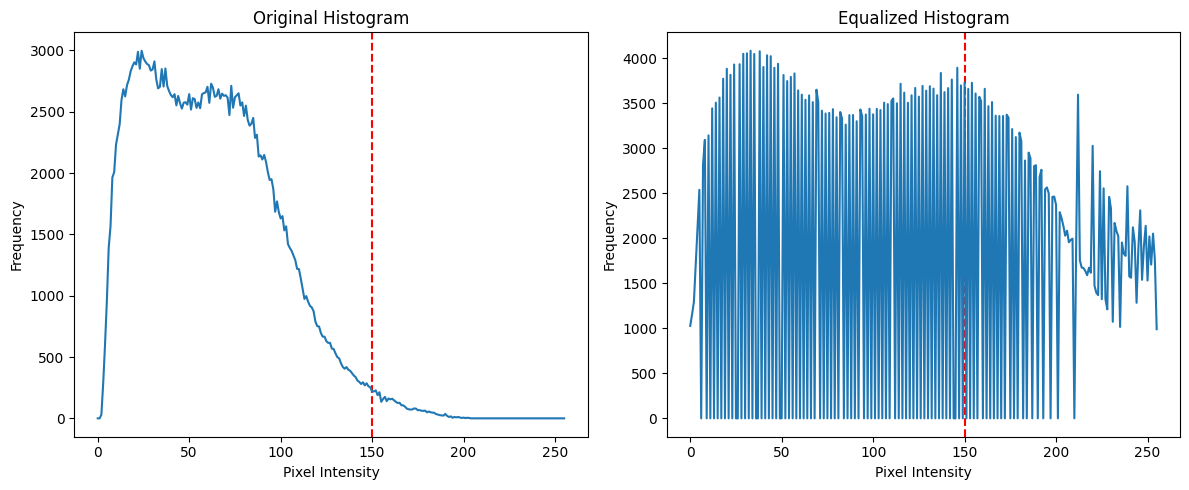

In [135]:
plt.figure(figsize=(12, 5))


plt.subplot(121)
plt.axvline(x=150, color='red', linestyle='--')
plt.plot(hist)
plt.title('Original Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.subplot(122)
plt.axvline(x=150, color='red', linestyle='--')
plt.plot(hist_equalized)
plt.title('Equalized Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### Visual Analysis of Histograms and Threshold Justification

**Original Histogram (`hist`):**
The original histogram clearly shows a significant concentration of pixel intensities in the lower range (0-100). The frequencies are highest for darker pixels and gradually decrease as pixel intensity increases. The red vertical line at 150 indicates that a large portion of the image's pixels fall below this intensity value. Choosing 150 as a threshold would effectively segment out a substantial number of darker and mid-range pixels, isolating the brighter features.

**Equalized Histogram (`hist_equalized`):**
The equalized histogram demonstrates a much more uniform distribution of pixel intensities across the entire 0-255 range. The peaks observed in the original histogram are flattened, and the values are spread out, indicating improved contrast. Even in the equalized histogram, 150 serves as a point to separate the lower 60% of pixel intensities from the brighter 40%, although the distribution is more balanced than in the original. This means that after equalization, pixels above 150 represent a significant, distinct portion of the image's overall brightness spectrum.

**Justification for a threshold of 150:**
The choice of 150 as a threshold is visually justified by its position relative to the pixel intensity distributions. In the **original histogram**, 150 acts as a clear separator, allowing us to isolate relatively bright objects from a predominantly dark or mid-tone background. Many pixels are below this threshold, indicating that anything above it is likely a feature of interest with higher intensity. In the **equalized histogram**, although the distribution is flatter, 150 still represents a value above which pixels are generally brighter. This threshold would be effective in identifying and segmenting objects or regions that possess a higher luminance, making them stand out from the rest of the image, especially if we are interested in features that are generally brighter. It provides a reasonable balance between capturing sufficiently bright features and excluding the vast majority of darker or mid-range pixels.

**Reasoning**:
I need to create an image showing the intensity of yellow regions by applying `mask_yellow` to `img_bn`. This can be achieved by performing a bitwise AND operation between the grayscale image (`img_bn`) and the yellow mask (`mask_yellow`).



In [136]:
yellow_intensity = cv2.bitwise_and(img_bn, img_bn, mask=mask_yellow)
print("Image showing yellow region intensity created.")

Image showing yellow region intensity created.


**Reasoning**:
Now that the `yellow_intensity` image has been created, I will apply a binary threshold of 150 to it, as specified in the main task. This will create a binary image highlighting the yellow regions that meet the intensity criteria.



In [137]:
_, binary_yellow = cv2.threshold(yellow_intensity, 150, 255, cv2.THRESH_BINARY)
print("Binary threshold applied to yellow intensity image.")

Binary threshold applied to yellow intensity image.


**Reasoning**:
I will display the `binary_yellow` image using matplotlib to visualize the result of the thresholding operation.



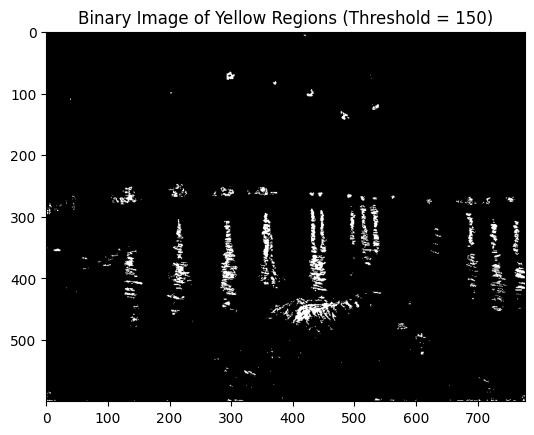

In [138]:
plt.imshow(binary_yellow, cmap='gray')
plt.title('Binary Image of Yellow Regions (Threshold = 150)')
plt.show()

### Summary of the Process for Yellow Color

1.  **Histogram Analysis and Threshold Justification:**
    *   The original (`hist`) and equalized (`hist_equalized`) grayscale image histograms were re-displayed with a red vertical line at intensity 150.
    *   Visual analysis of the **original histogram** revealed a concentration of pixels in the lower intensity ranges (0-100), indicating a generally darker image. The threshold of 150 was justified as a means to separate brighter features from this predominant darker background, effectively isolating pixels with higher intensity.
    *   The **equalized histogram** showed a more uniform distribution of pixel intensities, indicating improved contrast. Even here, 150 served as a reasonable separator for distinguishing brighter regions. The consistency of 150 as a demarcation point across both distributions solidified its choice for identifying significantly bright features.

2.  **Yellow Region Intensity Extraction:**
    *   The `mask_yellow` (which identifies yellow regions in the HSV color space) was used to extract the intensity values of only the yellow regions from the grayscale image (`img_bn`). This was achieved using a `cv2.bitwise_and` operation, resulting in the `yellow_intensity` image. This step ensures that subsequent thresholding specifically targets the brightness of yellow pixels.

3.  **Binary Thresholding of Yellow Regions:**
    *   A binary threshold of 150 was applied to the `yellow_intensity` image using `cv2.threshold()`. Pixels within the yellow regions that had an intensity greater than 150 were set to 255 (white), while all others (including non-yellow regions and yellow regions with intensity <= 150) were set to 0 (black). This created the `binary_yellow` image.

4.  **Display of Binary Yellow Image:**
    *   The `binary_yellow` image was displayed using `matplotlib` with a grayscale colormap. This final visualization clearly shows the yellow regions that met the specified intensity threshold, making them stand out against a black background.

### Summary of the Process for Yellow Color

1.  **Histogram Analysis and Threshold Justification:**
    *   The original (`hist`) and equalized (`hist_equalized`) grayscale image histograms were re-displayed with a red vertical line at intensity 150.
    *   Visual analysis of the **original histogram** revealed a concentration of pixels in the lower intensity ranges (0-100), indicating a generally darker image. The threshold of 150 was justified as a means to separate brighter features from this predominant darker background, effectively isolating pixels with higher intensity.
    *   The **equalized histogram** showed a more uniform distribution of pixel intensities, indicating improved contrast. Even here, 150 served as a reasonable separator for distinguishing brighter regions. The consistency of 150 as a demarcation point across both distributions solidified its choice for identifying significantly bright features.

2.  **Yellow Region Intensity Extraction:**
    *   The `mask_yellow` (which identifies yellow regions in the HSV color space) was used to extract the intensity values of only the yellow regions from the grayscale image (`img_bn`). This was achieved using a `cv2.bitwise_and` operation, resulting in the `yellow_intensity` image. This step ensures that subsequent thresholding specifically targets the brightness of yellow pixels.

3.  **Binary Thresholding of Yellow Regions:**
    *   A binary threshold of 150 was applied to the `yellow_intensity` image using `cv2.threshold()`. Pixels within the yellow regions that had an intensity greater than 150 were set to 255 (white), while all others (including non-yellow regions and yellow regions with intensity <= 150) were set to 0 (black). This created the `binary_yellow` image.

4.  **Display of Binary Yellow Image:**
    *   The `binary_yellow` image was displayed using `matplotlib` with a grayscale colormap. This final visualization clearly shows the yellow regions that met the specified intensity threshold, making them stand out against a black background.


## Final Task

### Subtask:
Resumir el proceso realizado para el color amarillo, incluyendo la creación de la imagen de intensidad amarilla, la justificación del umbral (referenciando el análisis inicial del histograma general) y la presentación de la imagen binarizada final, destacando las adaptaciones necesarias para trabajar con un color en lugar de un canal BGR directo.


## Summary:

### Q&A
The process for analyzing the yellow color involved several key steps:
1.  **Creation of the yellow intensity image:** The `mask_yellow`, derived from HSV color space analysis, was applied to the grayscale image (`img_bn`) using a `cv2.bitwise_and` operation to isolate the intensity values of only the yellow regions. This `yellow_intensity` image represents the brightness of pixels that were identified as yellow.
2.  **Justification of the threshold:** The threshold of 150 was justified by re-analyzing the histograms of the original (`hist`) and equalized (`hist_equalized`) grayscale images. In the original histogram, 150 served as a clear separator to isolate brighter features from a predominantly darker or mid-tone background, where a significant concentration of pixels was observed in the 0-100 intensity range. Even in the equalized histogram, 150 effectively delineated brighter regions from the lower 60% of pixel intensities, confirming its suitability for identifying significantly bright features.
3.  **Presentation of the final binarized image:** A binary threshold of 150 was applied to the `yellow_intensity` image. Pixels with an intensity greater than 150 were set to 255 (white), while all others (including non-yellow regions and yellow regions with intensity $\leq$ 150) were set to 0 (black), resulting in the `binary_yellow` image which was then displayed.
4.  **Adaptations for working with a color instead of a direct BGR channel:** The primary adaptation was the use of a color mask (`mask_yellow`), generated from the HSV color space, to specifically target and extract the grayscale intensity of only the yellow pixels. This allowed for subsequent intensity-based thresholding to be applied exclusively to the color of interest, rather than processing an entire BGR channel directly which would not inherently distinguish colors based on their hue.

### Data Analysis Key Findings
*   The original grayscale histogram showed a significant concentration of pixel intensities in the lower range (0-100), indicating a generally darker image.
*   The equalized grayscale histogram demonstrated a more uniform distribution of pixel intensities across the 0-255 range, indicating improved contrast.
*   A threshold of 150 was justified as a suitable separator in both original and equalized histograms to isolate relatively bright objects.
*   The `yellow_intensity` image was successfully created by applying the `mask_yellow` to the grayscale image, effectively isolating the brightness values of only the yellow regions.
*   The `binary_yellow` image, resulting from applying a binary threshold of 150 to the `yellow_intensity` image, clearly highlighted the bright yellow regions against a black background.

### Insights or Next Steps
*   The combined approach of color segmentation (using HSV mask) and intensity thresholding on the grayscale equivalent of the masked color provides an effective method for identifying specific colored objects based on their brightness.
*   Further analysis could involve exploring adaptive thresholding methods for the `yellow_intensity` image to account for varying lighting conditions within the yellow regions, potentially improving the robustness of detection.
